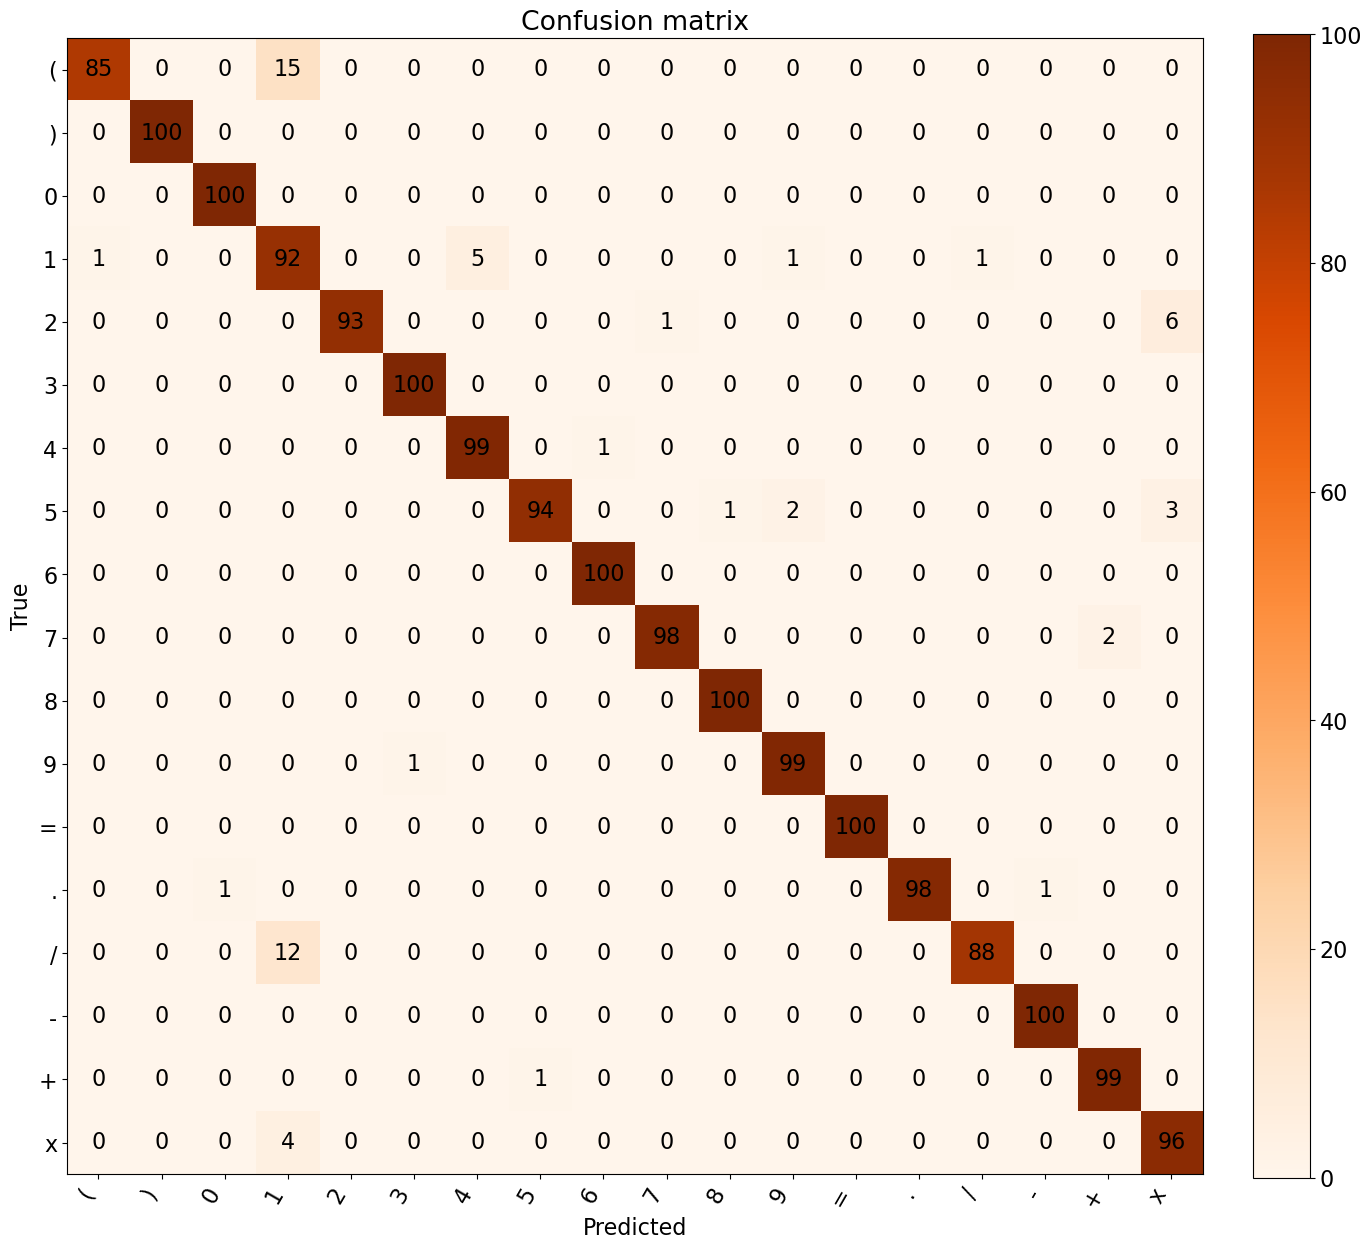

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cm = pd.read_csv("confusion_matrix.csv", index_col=0)
#cm = pd.read_csv("confusion_validation_matrix.csv", index_col=0)

cm.index = cm.index.str.replace("dot", ".").str.replace("forward_slash", "/").str.replace("minus", "-").str.replace("plus", "+")
cm.columns = cm.columns.str.replace("dot", ".").str.replace("forward_slash", "/").str.replace("minus", "-").str.replace("plus", "+")

def plot_cm(cm_df, title):
    arr = cm_df.values

    plt.figure(figsize=(14, 14))
    plt.rcParams.update({'font.size': 16})
    im = plt.imshow(arr, interpolation="nearest", cmap="Oranges")  
    #im = plt.imshow(arr, interpolation="nearest", cmap="Blues")
    plt.colorbar(im, fraction=0.046, pad=0.04)

    plt.xticks(range(len(cm_df.columns)), cm_df.columns, rotation=60, ha="right")
    plt.yticks(range(len(cm_df.index)), cm_df.index)
    plt.xlabel("Predicted")
    plt.ylabel("True")

    plt.title(title)

    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            plt.text(j, i, int(arr[i, j]), ha="center", va="center", fontsize=16)

    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    plt.show()

plot_cm(cm, "Confusion matrix")



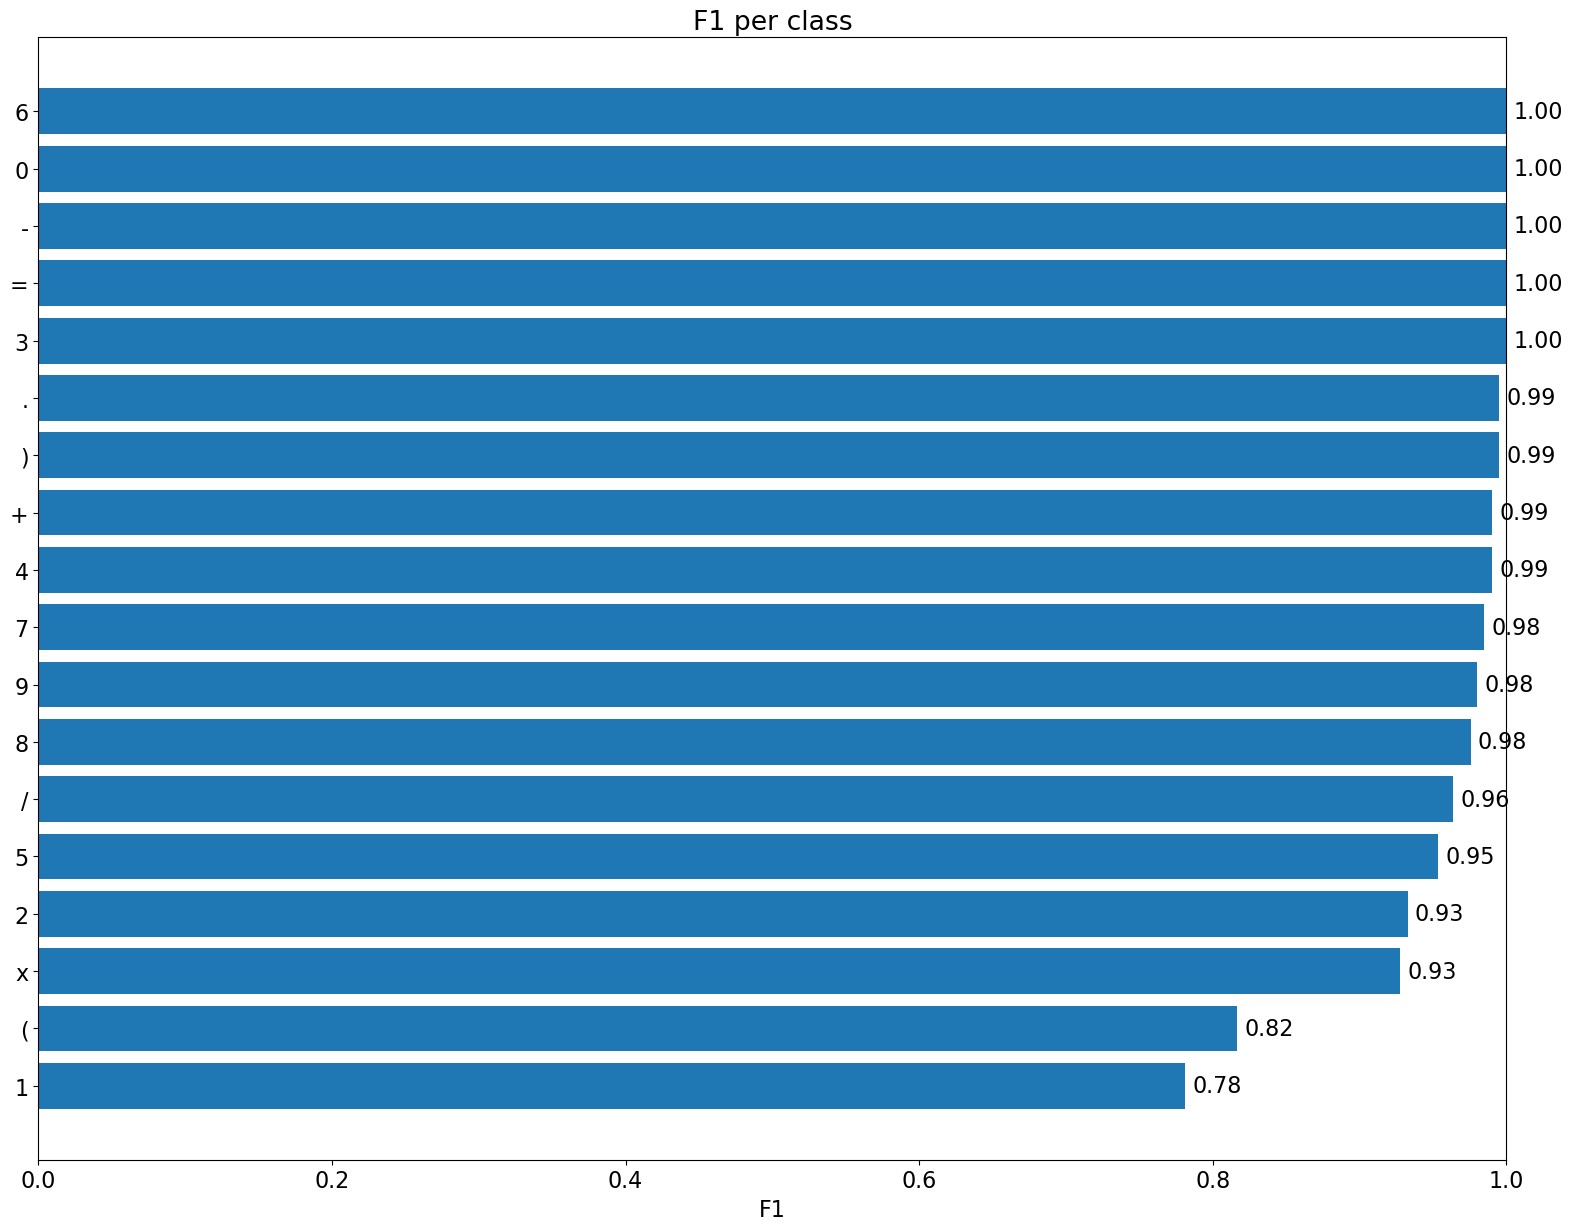

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


df = pd.read_csv("class_f1.csv")

df["Class"] = df["Class"].str.replace("dot", ".").str.replace("forward_slash", "/").str.replace("minus", "-").str.replace("plus", "+")

df = df.sort_values("F1", ascending=True) 
y = np.arange(len(df))

plt.figure(figsize=(16, max(4, 0.7 * len(df))))
plt.rcParams.update({'font.size': 16})
plt.barh(y, df["F1"].values)
plt.yticks(y, df["Class"].values)
plt.xlabel("F1")
plt.title("F1 per class")

for i, v in enumerate(df["F1"].values):
    plt.text(v + 0.005, i, f"{v:.2f}", va="center", fontsize=16)

plt.xlim(0, 1)
plt.tight_layout()
plt.show()
